<a href="https://colab.research.google.com/github/TytonTerrapin/Apple-Stock-Prediction/blob/main/NN_CODE_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Performing Various Predictions Using the Apple Stock Dataset**

##**GOALS**

*   *Performing EDA on the DataSet to find out relation between different Values.*

*   *Predicting Close Value of the Stock Price Using data such as Open , High and Low using Regression Models.*

*   *Predicting Values (Open , Close etc..) For the next day using ongoing day's data using Regression Models.*

*   *Predicting the Market Status using Classifier Models.*






#**Importing Libraries**

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

In [254]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Loading Dataset**

In [255]:
df = pd.read_excel('/content/drive/MyDrive/Arnav_Bansal_2024UCM2323/Dataset/apple_stock_final.xlsx')
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000


#**Feature Engineering**

In [256]:
#Introducing a feature to display the Market Status
df['Market Status'] = np.sign(df['Close']-df['Open'])
df


,Date,Adj Close,Close,High,Low,Open,Volume,Market Status
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.0
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,-1.0
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,-1.0
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.0
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.0
...,...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,-1.0
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,-1.0
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,-1.0
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000,-1.0


In [257]:
#Introducing Next Day Features to Help in training model later on...
df['Open_next'] = df['Open'].shift(-1)
df['High_next'] = df['High'].shift(-1)
df['Low_next'] = df['Low'].shift(-1)
df['Close_next'] = df['Close'].shift(-1)
df['Adj Close_next'] = df['Adj Close'].shift(-1)
df['Volume_next'] = df['Volume'].shift(-1)
df['Market Status_next'] = df['Market Status'].shift(-1)
df.dropna(inplace=True) #To Remove Rows with NULL values in the Next Day Feature
df

,Date,Adj Close,Close,High,Low,Open,Volume,Market Status,Open_next,High_next,Low_next,Close_next,Adj Close_next,Volume_next,Market Status_next
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.0,0.122210,0.122210,0.121652,0.121652,0.093678,175884800.0,-1.0
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,-1.0,0.113281,0.113281,0.112723,0.112723,0.086802,105728000.0,-1.0
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,-1.0,0.115513,0.116071,0.115513,0.115513,0.088951,86441600.0,0.0
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.0,0.118862,0.119420,0.118862,0.118862,0.091530,73449600.0,0.0
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.0,0.126116,0.126674,0.126116,0.126116,0.097116,48630400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11101,2024-12-26,259.019989,259.019989,260.100006,257.630005,258.190002,27237100,1.0,257.829987,258.700012,253.059998,255.589996,255.589996,42355300.0,-1.0
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,-1.0,252.229996,253.500000,250.750000,252.199997,252.199997,35557500.0,-1.0
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,-1.0,252.440002,253.279999,249.429993,250.419998,250.419998,39480700.0,-1.0
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,-1.0,248.929993,249.100006,241.820007,243.850006,243.850006,55558000.0,-1.0


#**EDA**

##*Basic Info*

In [258]:
df.describe()

,Date,Adj Close,Close,High,Low,Open,Volume,Market Status,Open_next,High_next,Low_next,Close_next,Adj Close_next,Volume_next,Market Status_next
count,11106,11106.000000,11106.000000,11106.000000,11106.000000,11106.000000,1.110600e+04,11106.000000,11106.000000,11106.000000,11106.000000,11106.000000,11106.000000,1.110600e+04,11106.000000
mean,2002-12-13 22:07:27.325769856,23.502389,24.337843,24.578397,24.072997,24.319354,3.154612e+08,-0.012876,24.341255,24.600372,24.094765,24.359789,23.524338,3.154203e+08,-0.012786
min,1980-12-12 00:00:00,0.037815,0.049107,0.049665,0.049107,0.049665,0.000000e+00,-1.000000,0.049665,0.049665,0.049107,0.049107,0.037815,0.000000e+00,-1.000000
25%,1991-12-05 06:00:00,0.243323,0.300256,0.306362,0.292411,0.300045,1.111254e+08,-1.000000,0.300190,0.306379,0.292411,0.300463,0.243584,1.111158e+08,-1.000000
50%,2002-12-09 12:00:00,0.446397,0.542411,0.553214,0.534040,0.542545,2.037224e+08,0.000000,0.543214,0.553482,0.534709,0.542411,0.446682,2.036776e+08,0.000000
75%,2013-12-18 18:00:00,18.254964,21.376875,21.548303,21.104465,21.361696,3.960593e+08,1.000000,21.369018,21.577678,21.120001,21.401072,18.262345,3.959823e+08,1.000000
max,2025-01-02 00:00:00,259.019989,259.019989,260.100006,257.630005,258.190002,7.421641e+09,1.000000,258.190002,260.100006,257.630005,259.019989,259.019989,7.421641e+09,1.000000
std,NaN,49.726178,50.176539,50.651338,49.641859,50.125999,3.348765e+08,0.966674,50.168550,50.693652,49.684348,50.219233,49.769625,3.348854e+08,0.966722


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11106 entries, 0 to 11105
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                11106 non-null  datetime64[ns]
 1   Adj Close           11106 non-null  float64       
 2   Close               11106 non-null  float64       
 3   High                11106 non-null  float64       
 4   Low                 11106 non-null  float64       
 5   Open                11106 non-null  float64       
 6   Volume              11106 non-null  int64         
 7   Market Status       11106 non-null  float64       
 8   Open_next           11106 non-null  float64       
 9   High_next           11106 non-null  float64       
 10  Low_next            11106 non-null  float64       
 11  Close_next          11106 non-null  float64       
 12  Adj Close_next      11106 non-null  float64       
 13  Volume_next         11106 non-null  float64       


##*Checking for Missing Values*

In [260]:
df.iloc[:, 1:].isnull().sum().sum() #NO Missing Values

0

##*Visualization / Plotting*

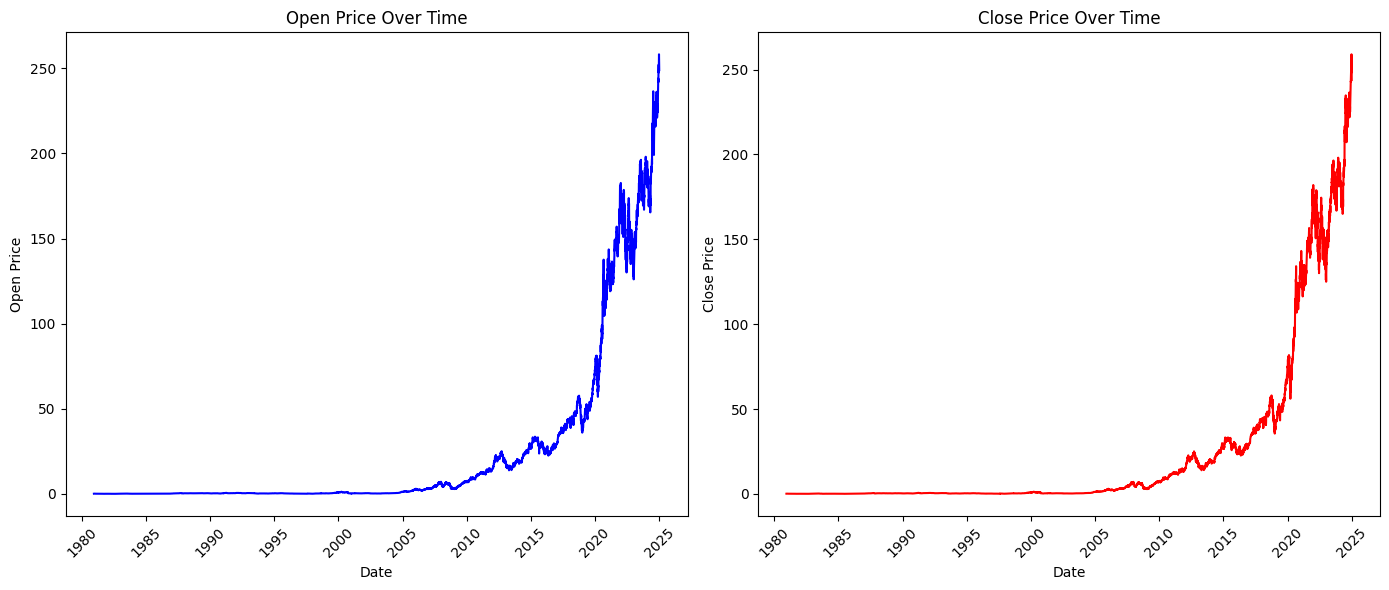

In [261]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  # 1 row, 2 columns

# Plotting Open Price
sns.lineplot(x=df['Date'], y=df['Open'], ax=axes[0], color="blue")
axes[0].set_title("Open Price Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Open Price")
axes[0].tick_params(axis='x', rotation=45)

# Plotting Close Price
sns.lineplot(x=df['Date'], y=df['Close'], ax=axes[1], color="red")
axes[1].set_title("Close Price Over Time")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Close Price")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

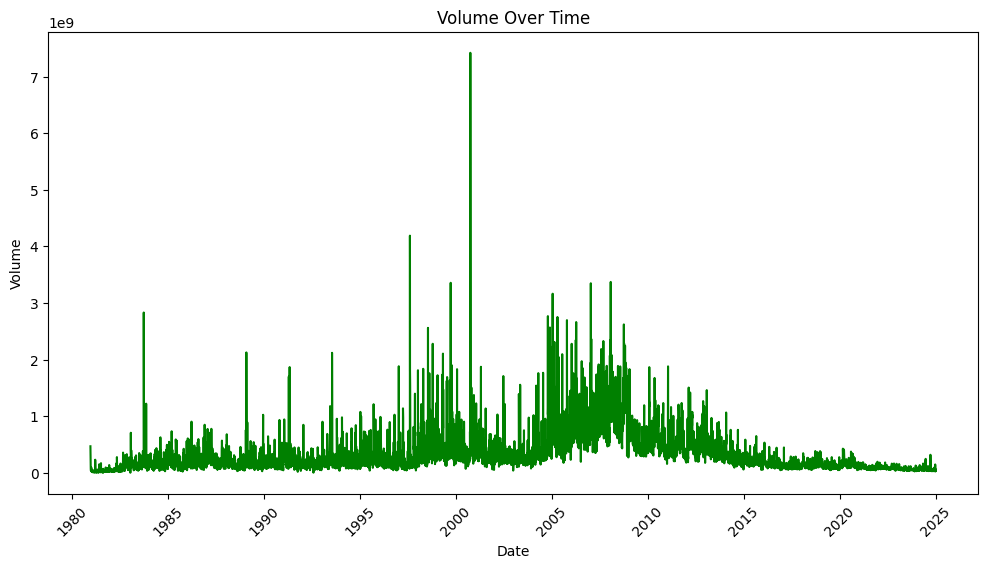

In [262]:
# Plotting Volume
plt.figure(figsize=(12, 6))
sns.lineplot( x=df['Date'] , y=df['Volume'] , color="green" )
plt.title("Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.show()

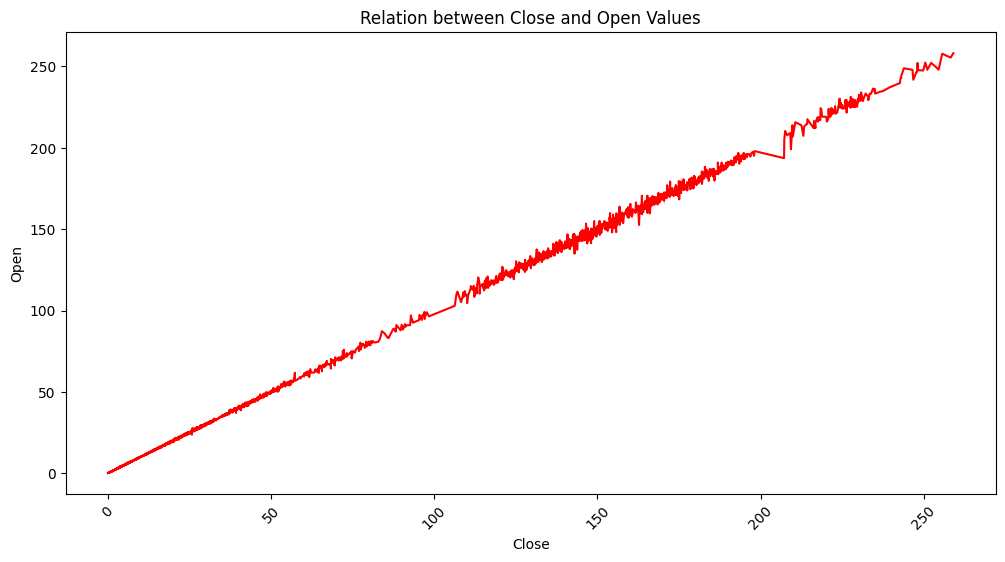

In [263]:
# Plotting Open vs Close
plt.figure(figsize=(12, 6))
sns.lineplot( x=df['Close'] , y=df['Open'] , color="red" )
plt.title("Relation between Close and Open Values")
plt.xlabel("Close")
plt.ylabel("Open")
plt.xticks(rotation=45)
plt.show()
#The Graph Shows a very Linear Relation Between Open and Close Price which will help us later during Model Selection

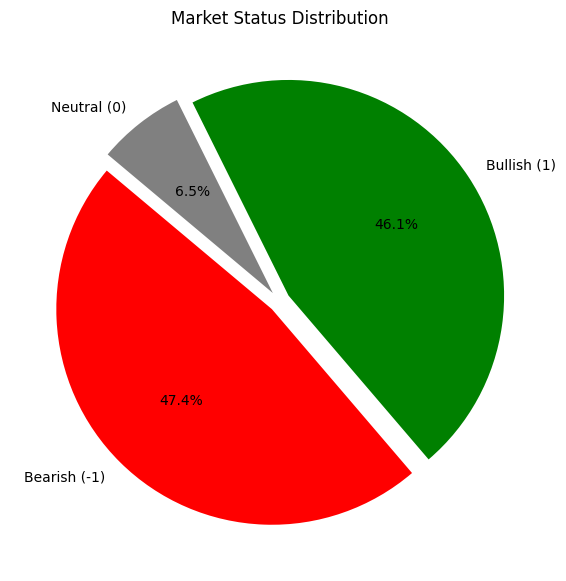

In [264]:
market_counts = df['Market Status'].value_counts()
labels = ["Bearish (-1)","Bullish (1)", "Neutral (0)"]
colors = ["red" ,"green", "gray"]

# Plotting pie chart
plt.figure(figsize=(7, 7))
plt.pie(market_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, explode=[0.05, 0.05, 0.05])
plt.title("Market Status Distribution")
plt.show()

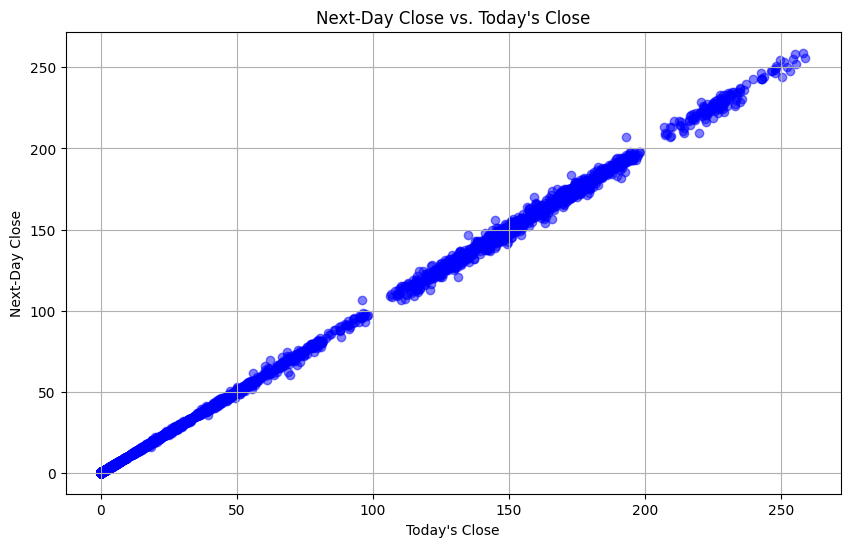

In [265]:
#plotting next-day close vs. current close
plt.figure(figsize=(10, 6))
plt.scatter(df['Close'], df['Close_next'], alpha=0.5, color='blue')
plt.title("Next-Day Close vs. Today's Close")
plt.xlabel("Today's Close")
plt.ylabel("Next-Day Close")
plt.grid(True)
plt.show()
#closely linear relation between consecutive close prices

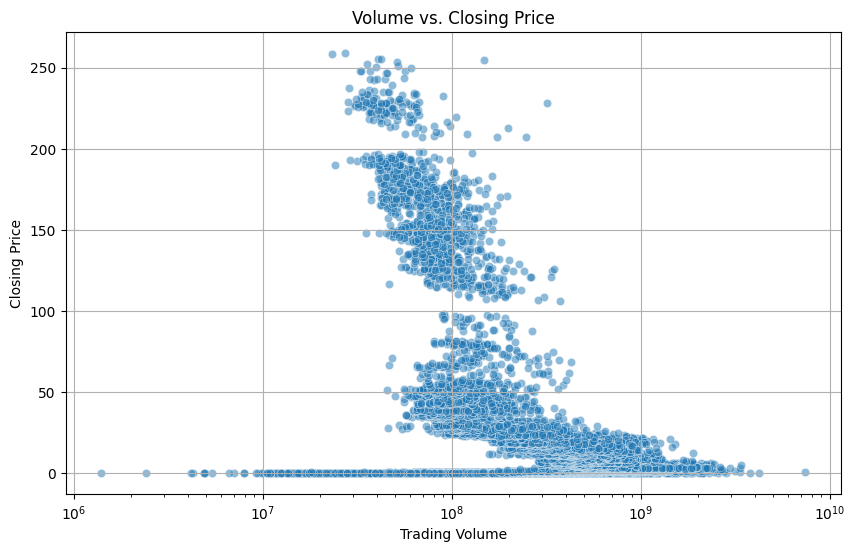

In [266]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Volume'], y=df['Close'], alpha=0.5)
plt.xlabel("Trading Volume")
plt.ylabel("Closing Price")
plt.title("Volume vs. Closing Price")
plt.xscale("log")
plt.grid(True)
plt.show()

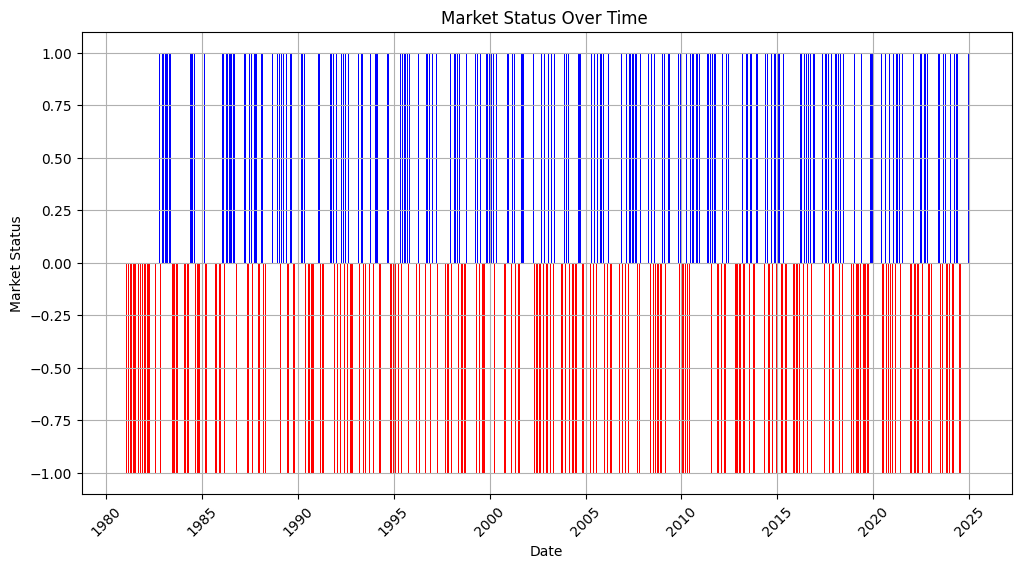

In [267]:
plt.figure(figsize=(12, 6))
plt.bar(df["Date"], df["Market Status"], color=['red' if s == -1 else 'blue' if s == 1 else 'gray' for s in df["Market Status"]])

plt.xlabel("Date")
plt.ylabel("Market Status")
plt.title("Market Status Over Time ")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#**Predicting Close Price**

##*Splitting the DataSet*

###**Dataset will be split chronologically here for the following reasons**

*   ***Avoiding Data Leakage*** : If data is shuffled randomly, future data points might be used to train the model, which is unrealistic as practically Models do not have access to future data for prediction
*   ***Capturing Market Trends & Seasonality***
*   ***Preserving Chronological Order***






In [268]:
X_sr = df[['Open','High','Low']]
y_sr = df[['Close']]
split_index = int(len(df)*0.80)
X_sr_train, X_sr_test = X_sr.iloc[:split_index], X_sr.iloc[split_index:]
y_sr_train, y_sr_test = y_sr.iloc[:split_index], y_sr.iloc[split_index:]

##*Scaling*

In [269]:
from sklearn.preprocessing import StandardScaler
scaler_srx = StandardScaler()
X_sr_train = scaler_srx.fit_transform(X_sr_train)
X_sr_test = scaler_srx.transform(X_sr_test)
scaler_sry = StandardScaler()
y_sr_train = scaler_sry.fit_transform(y_sr_train)
y_sr_test = scaler_sry.transform(y_sr_test)

##*Support Vector Regression(RBF kernel)*

In [270]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X_sr_train, y_sr_train)
y_sr_pred = regressor.predict(X_sr_test)
mse = mean_squared_error(y_sr_test, y_sr_pred)
r2_rbf = r2_score(y_sr_test, y_sr_pred)
r2_rbf

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-1.8790110063645233

###*Visualizing Result*

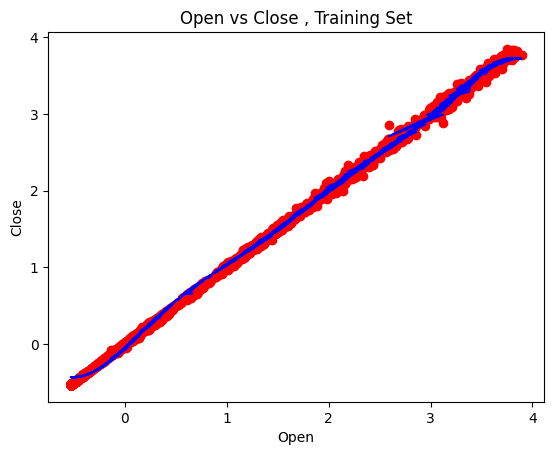

In [271]:
plt.scatter(X_sr_train[: , 0], y_sr_train, color='red')
plt.plot(X_sr_train[: , 0], regressor.predict(X_sr_train), color='blue')
plt.title('Open vs Close , Training Set')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

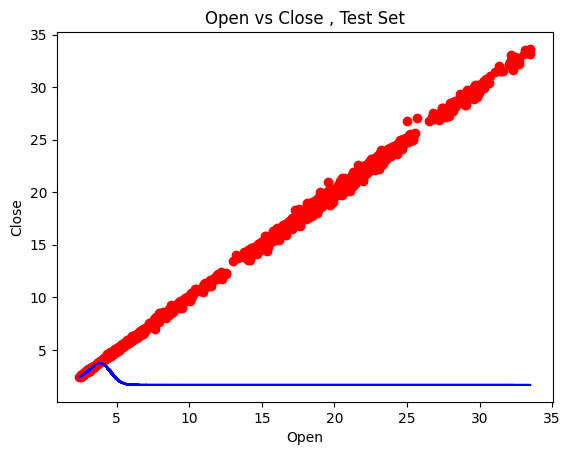

In [272]:
plt.scatter(X_sr_test[: , 0], y_sr_test, color='red')
plt.plot(X_sr_test[: , 0], regressor.predict(X_sr_test), color='blue')
plt.title('Open vs Close , Test Set')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

##*Random Forest Regression*

In [273]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200,
                                  max_depth=10,
                                  min_samples_split=10,
                                  min_samples_leaf=4,
                                  max_features='sqrt',
                                  random_state=42,
                                  n_jobs=-1)
regressor.fit(X_sr_train, y_sr_train)
y_sr_pred = regressor.predict(X_sr_test)
mse = mean_squared_error(y_sr_test, y_sr_pred)
r2_rfr = r2_score(y_sr_test, y_sr_pred)
r2_rfr

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


-1.2643660268457912

###*Visualizing Result*

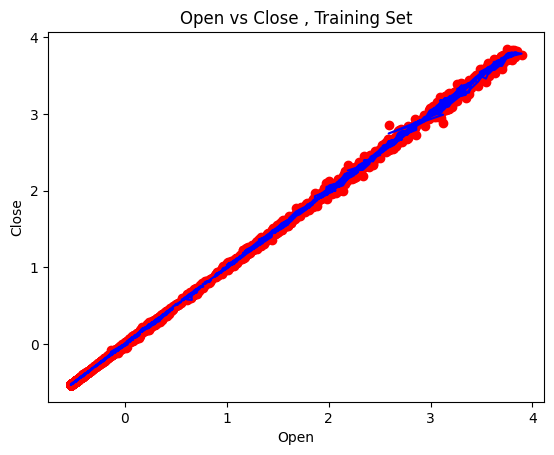

In [274]:
plt.scatter(X_sr_train[: , 0], y_sr_train, color='red')
plt.plot(X_sr_train[: , 0], regressor.predict(X_sr_train), color='blue')
plt.title('Open vs Close , Training Set')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

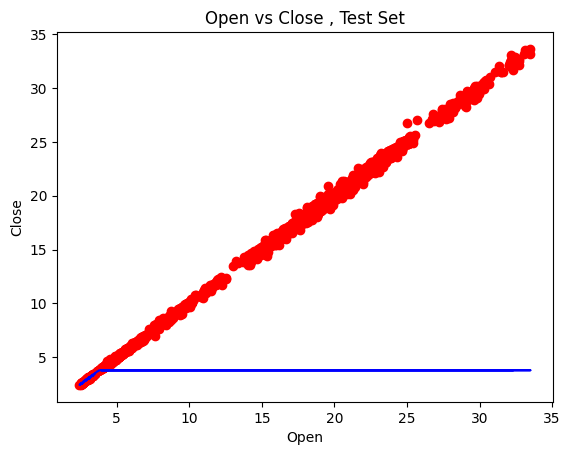

In [275]:
plt.scatter(X_sr_test[: , 0], y_sr_test, color='red')
plt.plot(X_sr_test[: , 0], regressor.predict(X_sr_test), color='blue')
plt.title('Open vs Close , Test Set')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

##*Decision Tree Regression*

In [276]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_sr_train, y_sr_train)
y_sr_pred = regressor.predict(X_sr_test)
mse = mean_squared_error(y_sr_test, y_sr_pred)
r2_dtr = r2_score(y_sr_test, y_sr_pred)
r2_dtr

-1.2591316644719925

###*Visualizing Result*

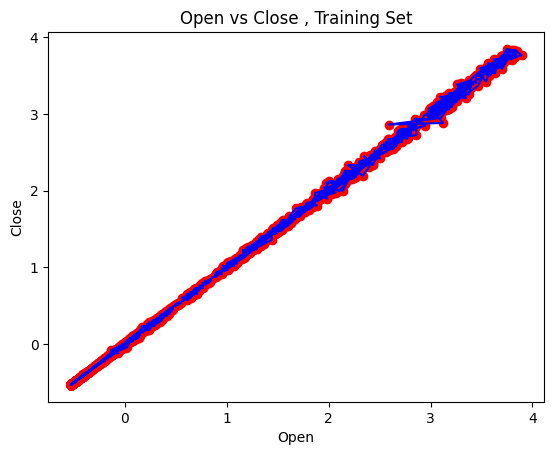

In [277]:
plt.scatter(X_sr_train[: , 0], y_sr_train, color='red')
plt.plot(X_sr_train[: , 0], regressor.predict(X_sr_train), color='blue')
plt.title('Open vs Close , Training Set')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

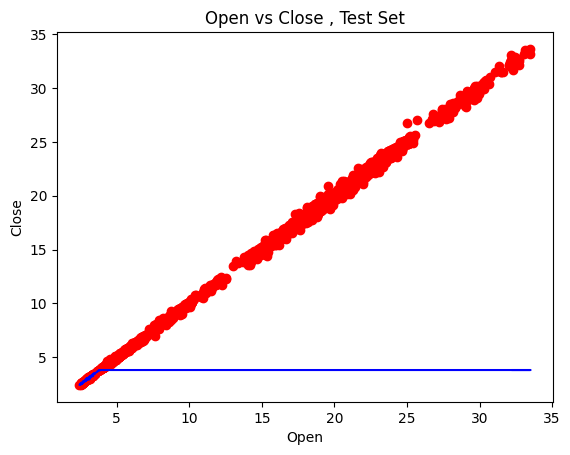

In [278]:
plt.scatter(X_sr_test[: , 0], y_sr_test, color='red')
plt.plot(X_sr_test[: , 0], regressor.predict(X_sr_test), color='blue')
plt.title('Open vs Close , Test Set')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

##*Support Vector Regression (Linear Kernel)*

In [279]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'linear')
regressor.fit(X_sr_train, y_sr_train)
y_sr_pred = regressor.predict(X_sr_test)
mse = mean_squared_error(y_sr_test, y_sr_pred)
r2_svr = r2_score(y_sr_test, y_sr_pred)
r2_svr

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9978774030084089

###*Visualizing Result*

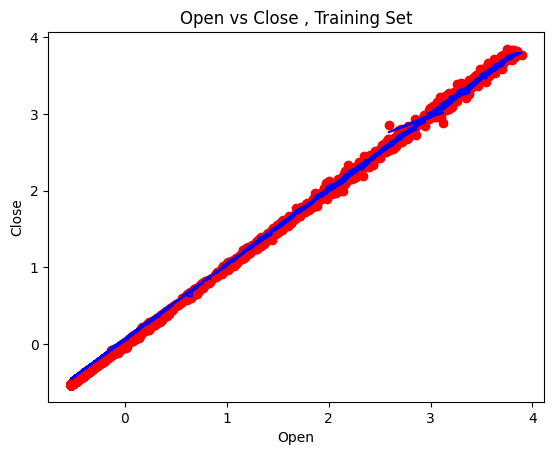

In [280]:
plt.scatter(X_sr_train[: , 0], y_sr_train, color='red')
plt.plot(X_sr_train[: , 0], regressor.predict(X_sr_train), color='blue')
plt.title('Open vs Close , Training Set')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

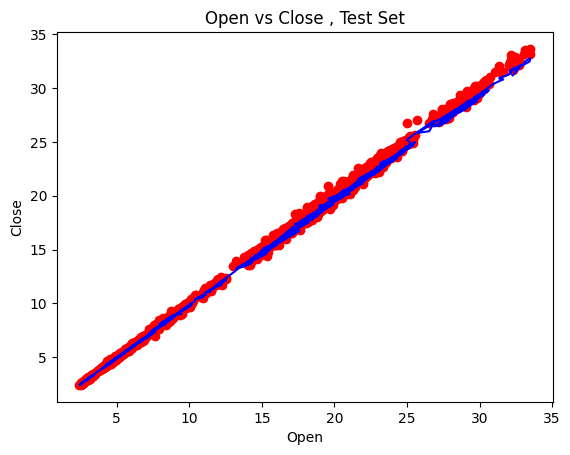

In [281]:
plt.scatter(X_sr_test[: , 0], y_sr_test, color='red')
plt.plot(X_sr_test[: , 0], regressor.predict(X_sr_test), color='blue')
plt.title('Open vs Close , Test Set')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

##*Linear Regression*

In [282]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_sr_train, y_sr_train)
y_sr_pred = regressor.predict(X_sr_test)
mse = mean_squared_error(y_sr_test, y_sr_pred)
r2_lr = r2_score(y_sr_test, y_sr_pred)
r2_lr

0.9998624965034808

###*Visualizing Result*

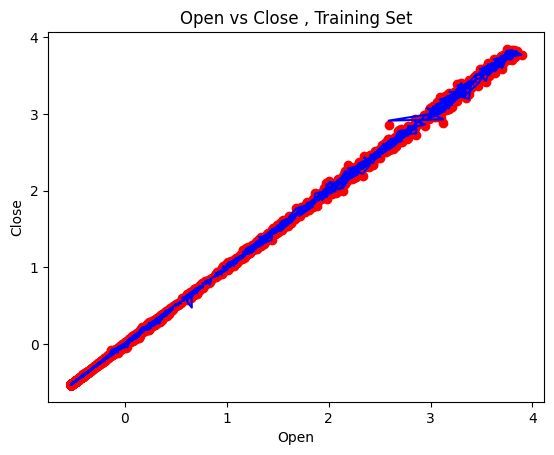

In [283]:
plt.scatter(X_sr_train[: , 0], y_sr_train, color='red')
plt.plot(X_sr_train[: , 0], regressor.predict(X_sr_train), color='blue')
plt.title('Open vs Close , Training Set')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

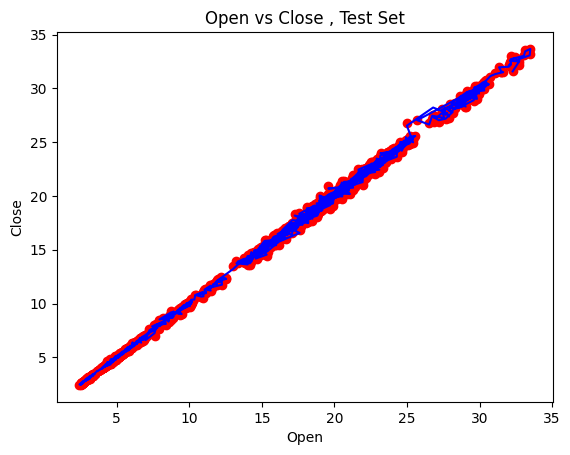

In [284]:
plt.scatter(X_sr_test[: , 0], y_sr_test, color='red')
plt.plot(X_sr_test[: , 0], regressor.predict(X_sr_test), color='blue')
plt.title('Open vs Close , Test Set')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

##***Conclusions***



*   *The best model based on r2 score is the linear regression model with the SVR(linear kernel) model coming very close.*
*   *Rest of the models perform poorly as shown by their negative r2 scores*
*   *This result can be explained by the very linear relation between the X features and Close Prices as shown here 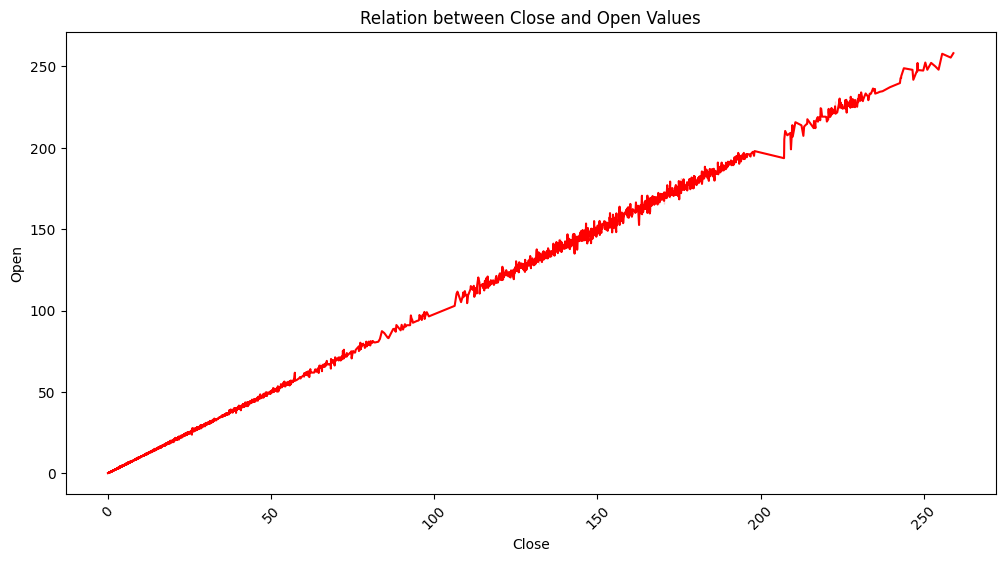*


In [285]:
#Using Linear Regression Model to make predictions
scaler_sry.inverse_transform(regressor.predict(scaler_srx.transform([[231.20,236.96,230.68]])))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[235.69003327]])

#**Predicting Next Day Values**

##*Splitting the DataSet*

###[Reason for Chronological split](#scrollTo=o6tLMT7K7FZG)

In [286]:
X_mr = df[['Open','High','Low','Adj Close','Close']]
y_mr = df[['Open_next','High_next','Low_next','Adj Close_next','Close_next']]
split_index = int(len(df)*0.80)
X_mr_train, X_mr_test = X_mr.iloc[:split_index], X_mr.iloc[split_index:]
y_mr_train, y_mr_test = y_mr.iloc[:split_index], y_mr.iloc[split_index:]

##*Scaling*

In [287]:
from sklearn.preprocessing import StandardScaler
scaler_mrx = StandardScaler()
X_mr_train = scaler_srx.fit_transform(X_mr_train)
X_mr_test = scaler_srx.transform(X_mr_test)
scaler_mry = StandardScaler()
y_mr_train = scaler_mry.fit_transform(y_mr_train)
y_mr_test = scaler_mry.transform(y_mr_test)

##*Support Vector Regression(RBF kernel)*

In [288]:
from sklearn.svm import SVR

regressor2 = SVR(kernel = 'rbf')
regressor2 = MultiOutputRegressor(regressor2)
regressor2.fit(X_mr_train, y_mr_train)
y_mr_pred = regressor2.predict(X_mr_test)
mse = mean_squared_error(y_mr_test, y_mr_pred)
r2_rbf = r2_score(y_mr_test, y_mr_pred)
r2_rbf

-1.8739005583519923

###*Visualization*

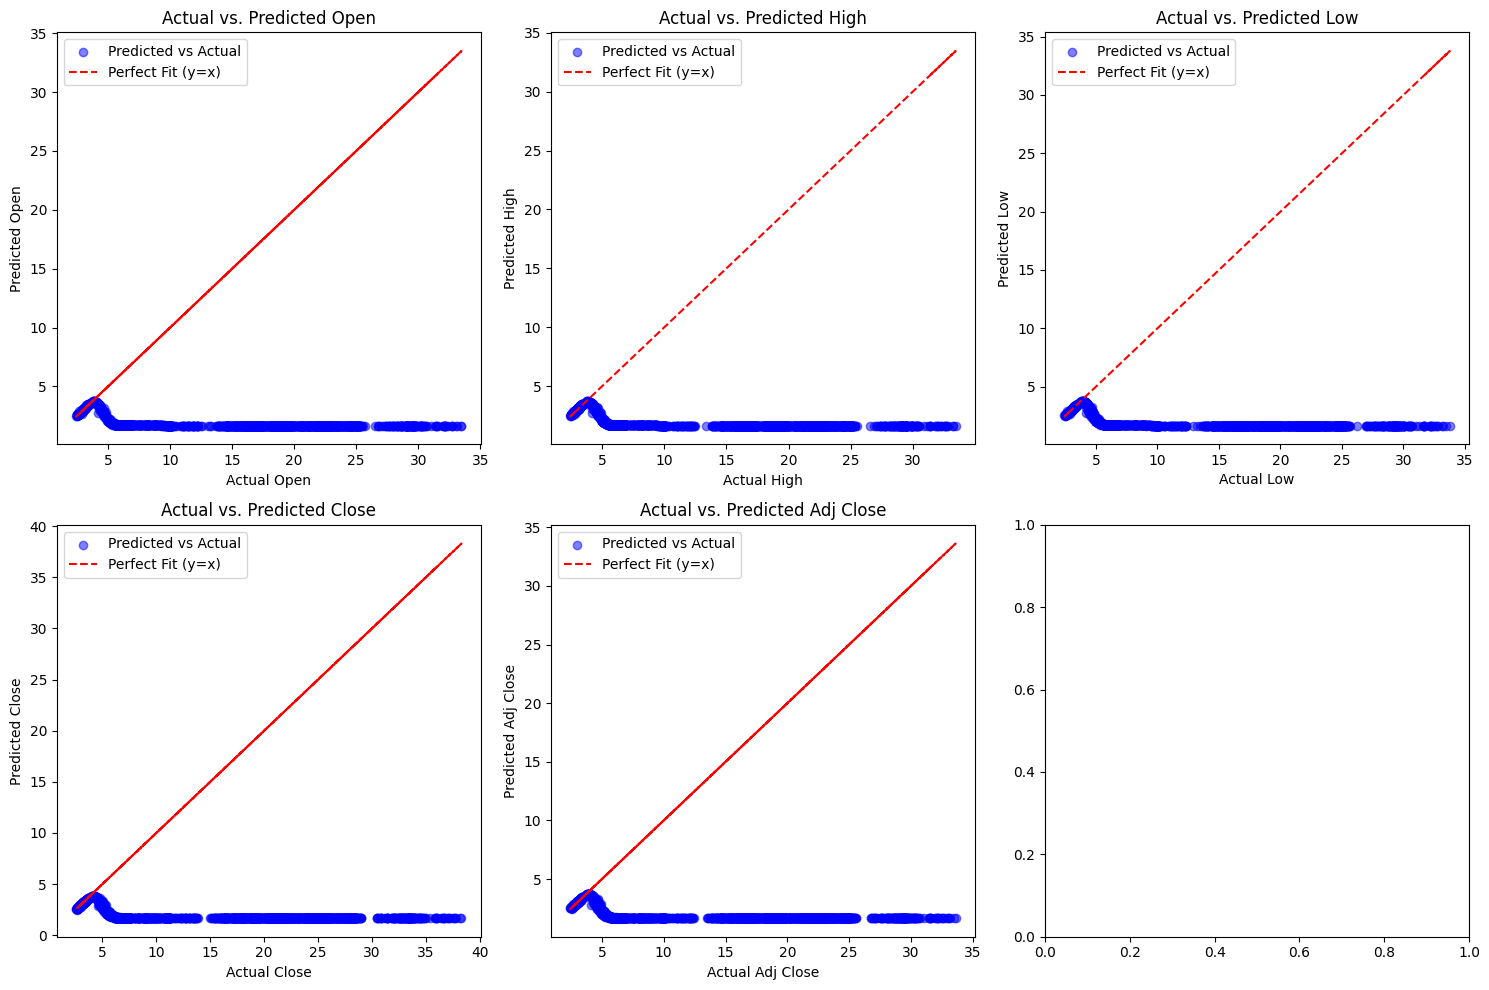

In [289]:
features = ["Open", "High", "Low", "Close", "Adj Close"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].scatter(y_mr_test[:, i], y_mr_pred[:, i], color="blue", alpha=0.5, label="Predicted vs Actual")
    axes[i].plot(y_mr_test[:, i], y_mr_test[:, i], color="red", linestyle="--", label="Perfect Fit (y=x)")
    axes[i].set_xlabel(f"Actual {feature}")
    axes[i].set_ylabel(f"Predicted {feature}")
    axes[i].set_title(f"Actual vs. Predicted {feature}")
    axes[i].legend()

plt.tight_layout()
plt.show()


##*Random Forest Regression*

In [290]:
from sklearn.ensemble import RandomForestRegressor

regressor2 = RandomForestRegressor(n_estimators=200,
                                  max_depth=10,
                                  min_samples_split=10,
                                  min_samples_leaf=4,
                                  max_features='sqrt',
                                  random_state=42,
                                  n_jobs=-1)
regressor2 = MultiOutputRegressor(regressor2)
regressor2.fit(X_mr_train, y_mr_train)
y_mr_pred = regressor2.predict(X_mr_test)
mse = mean_squared_error(y_mr_test, y_mr_pred)
r2_rfr = r2_score(y_mr_test, y_mr_pred)
r2_rfr

-1.2815839045267938

###*Visualization*

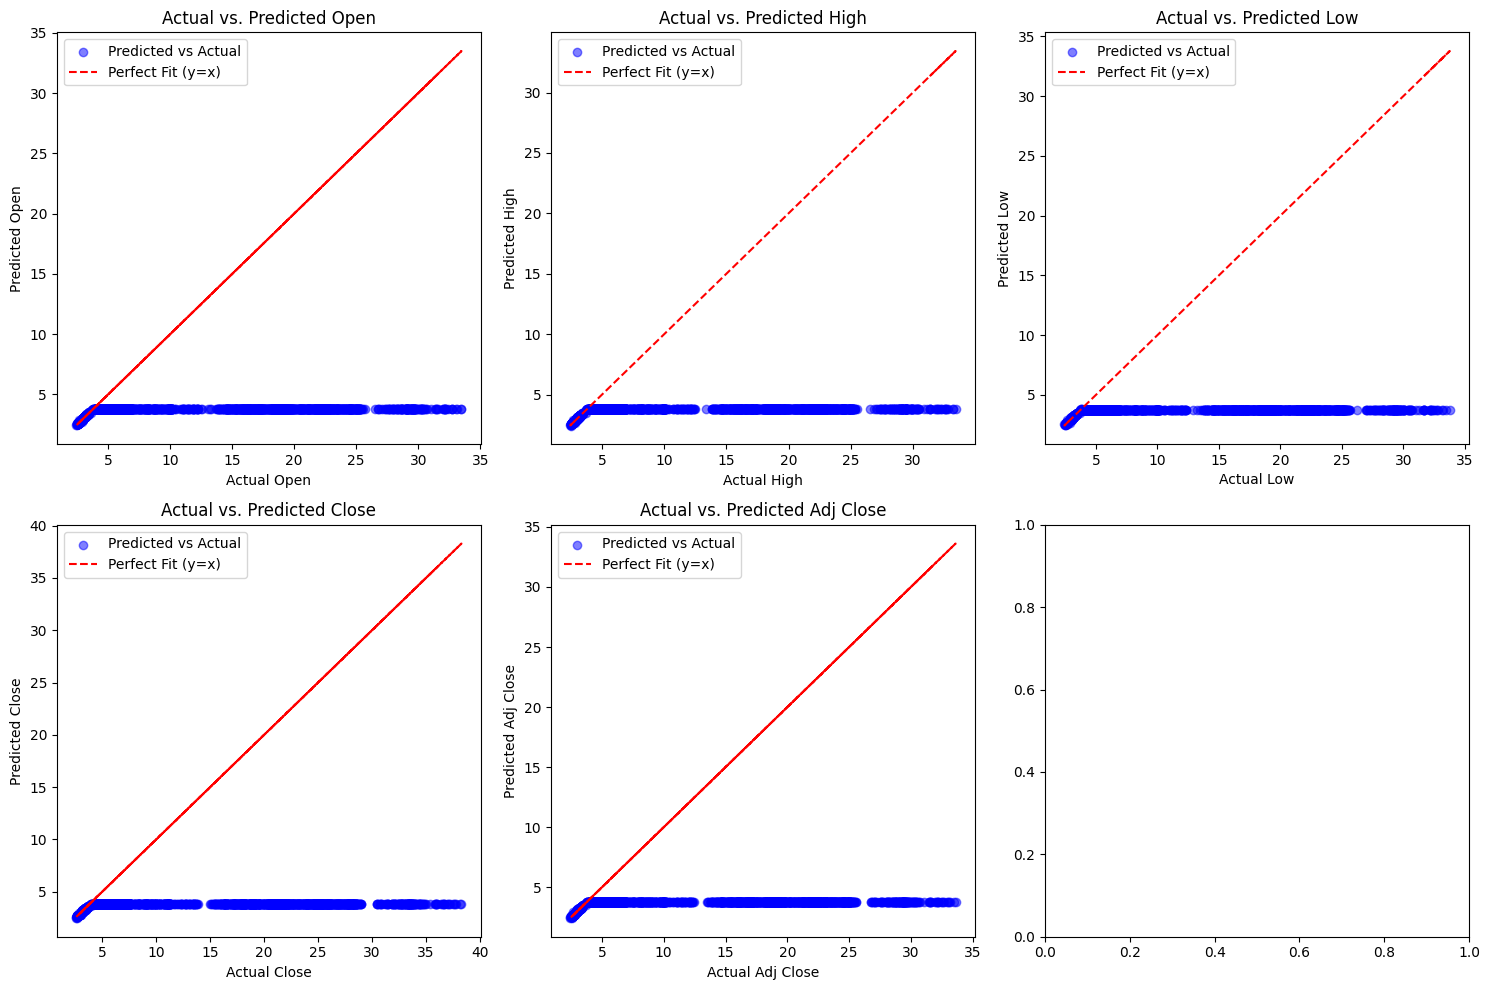

In [291]:
features = ["Open", "High", "Low", "Close", "Adj Close"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].scatter(y_mr_test[:, i], y_mr_pred[:, i], color="blue", alpha=0.5, label="Predicted vs Actual")
    axes[i].plot(y_mr_test[:, i], y_mr_test[:, i], color="red", linestyle="--", label="Perfect Fit (y=x)")
    axes[i].set_xlabel(f"Actual {feature}")
    axes[i].set_ylabel(f"Predicted {feature}")
    axes[i].set_title(f"Actual vs. Predicted {feature}")
    axes[i].legend()

plt.tight_layout()
plt.show()


##*Decision Tree Regression*

In [292]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 42)
regressor2 = MultiOutputRegressor(regressor2)
regressor2.fit(X_mr_train, y_mr_train)
y_mr_pred = regressor2.predict(X_mr_test)
mse = mean_squared_error(y_mr_test, y_mr_pred)
r2_rbf = r2_score(y_mr_test, y_mr_pred)
r2_rbf

-1.278223486341431

###*Visualization*

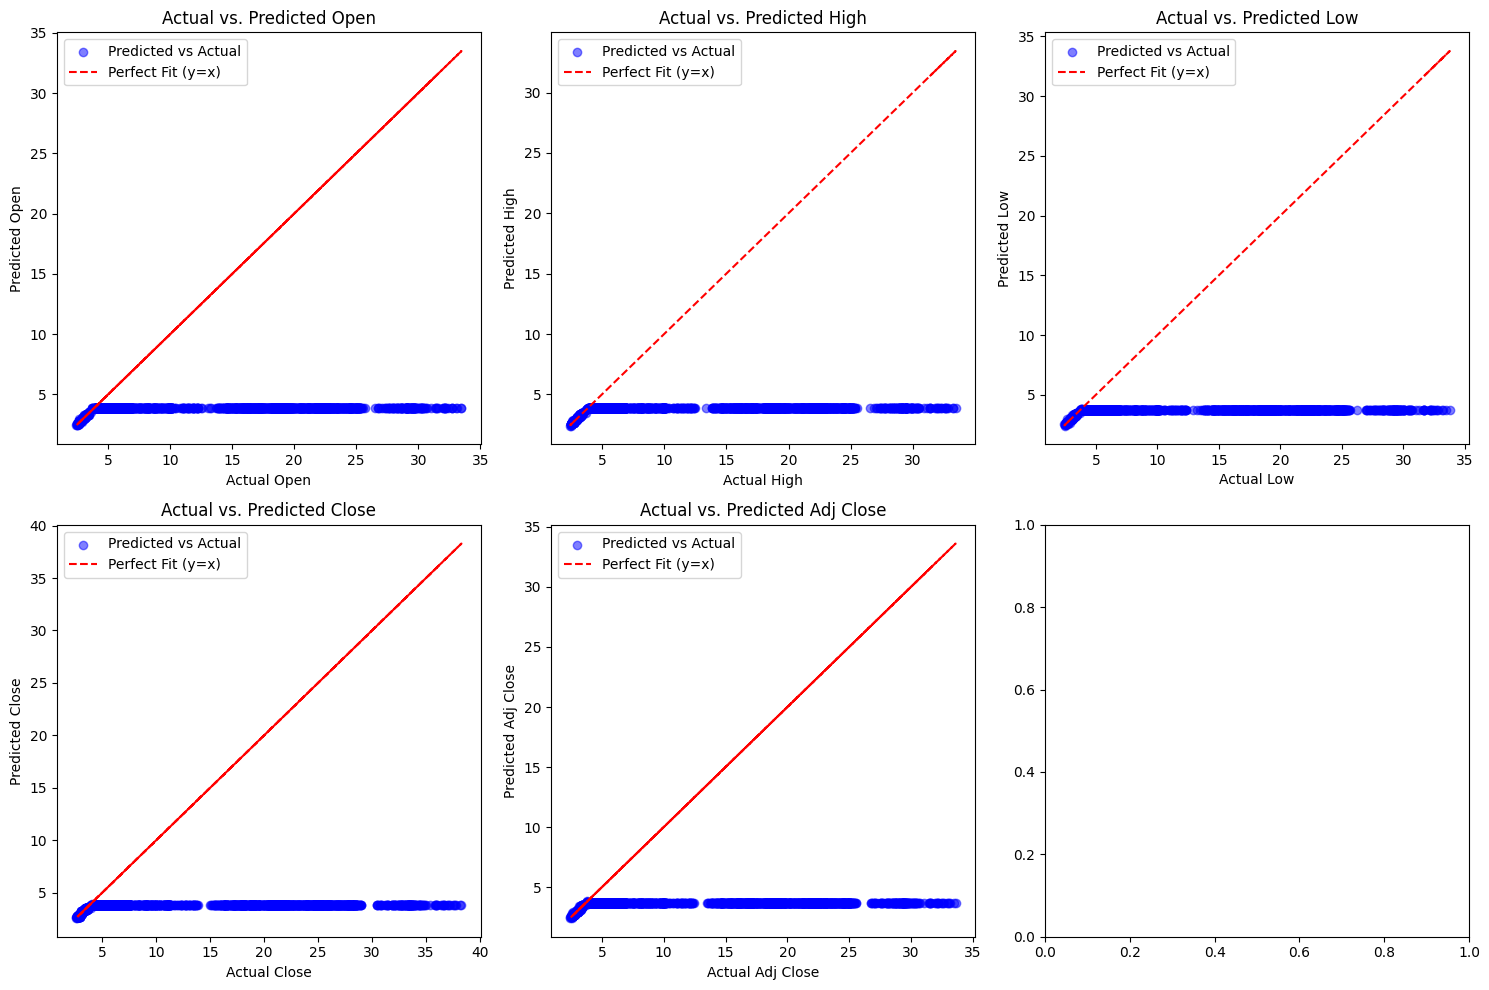

In [293]:
features = ["Open", "High", "Low", "Close", "Adj Close"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].scatter(y_mr_test[:, i], y_mr_pred[:, i], color="blue", alpha=0.5, label="Predicted vs Actual")
    axes[i].plot(y_mr_test[:, i], y_mr_test[:, i], color="red", linestyle="--", label="Perfect Fit (y=x)")
    axes[i].set_xlabel(f"Actual {feature}")
    axes[i].set_ylabel(f"Predicted {feature}")
    axes[i].set_title(f"Actual vs. Predicted {feature}")
    axes[i].legend()

plt.tight_layout()
plt.show()


##*Support Vector Regression (Linear Kernel)*

In [294]:
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'linear')
regressor2 = MultiOutputRegressor(regressor2)
regressor2.fit(X_mr_train, y_mr_train)
y_mr_pred = regressor2.predict(X_mr_test)
mse = mean_squared_error(y_mr_test, y_mr_pred)
r2_rbf = r2_score(y_mr_test, y_mr_pred)
r2_rbf

0.9991223144234743

###*Visualization*

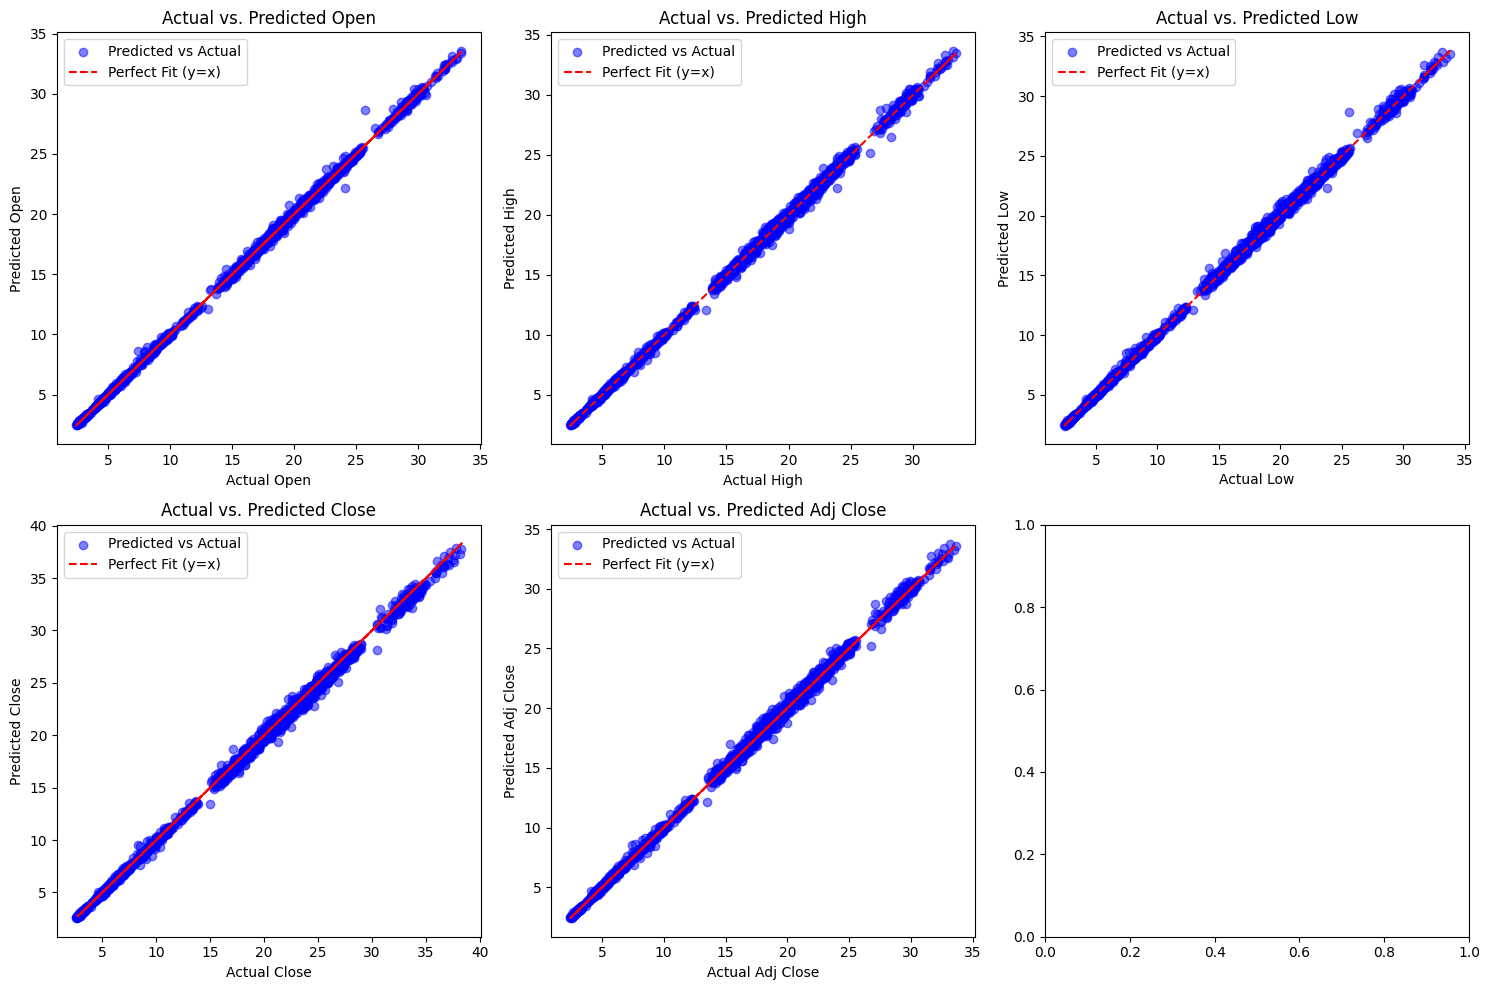

In [295]:
features = ["Open", "High", "Low", "Close", "Adj Close"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].scatter(y_mr_test[:, i], y_mr_pred[:, i], color="blue", alpha=0.5, label="Predicted vs Actual")
    axes[i].plot(y_mr_test[:, i], y_mr_test[:, i], color="red", linestyle="--", label="Perfect Fit (y=x)")
    axes[i].set_xlabel(f"Actual {feature}")
    axes[i].set_ylabel(f"Predicted {feature}")
    axes[i].set_title(f"Actual vs. Predicted {feature}")
    axes[i].legend()

plt.tight_layout()
plt.show()


##*Linear Regression*

In [296]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2 = MultiOutputRegressor(regressor2)
regressor2.fit(X_mr_train, y_mr_train)
y_mr_pred = regressor2.predict(X_mr_test)
mse = mean_squared_error(y_mr_test, y_mr_pred)
r2_rbf = r2_score(y_mr_test, y_mr_pred)
r2_rbf

0.9992373883025853

###*Visualization*

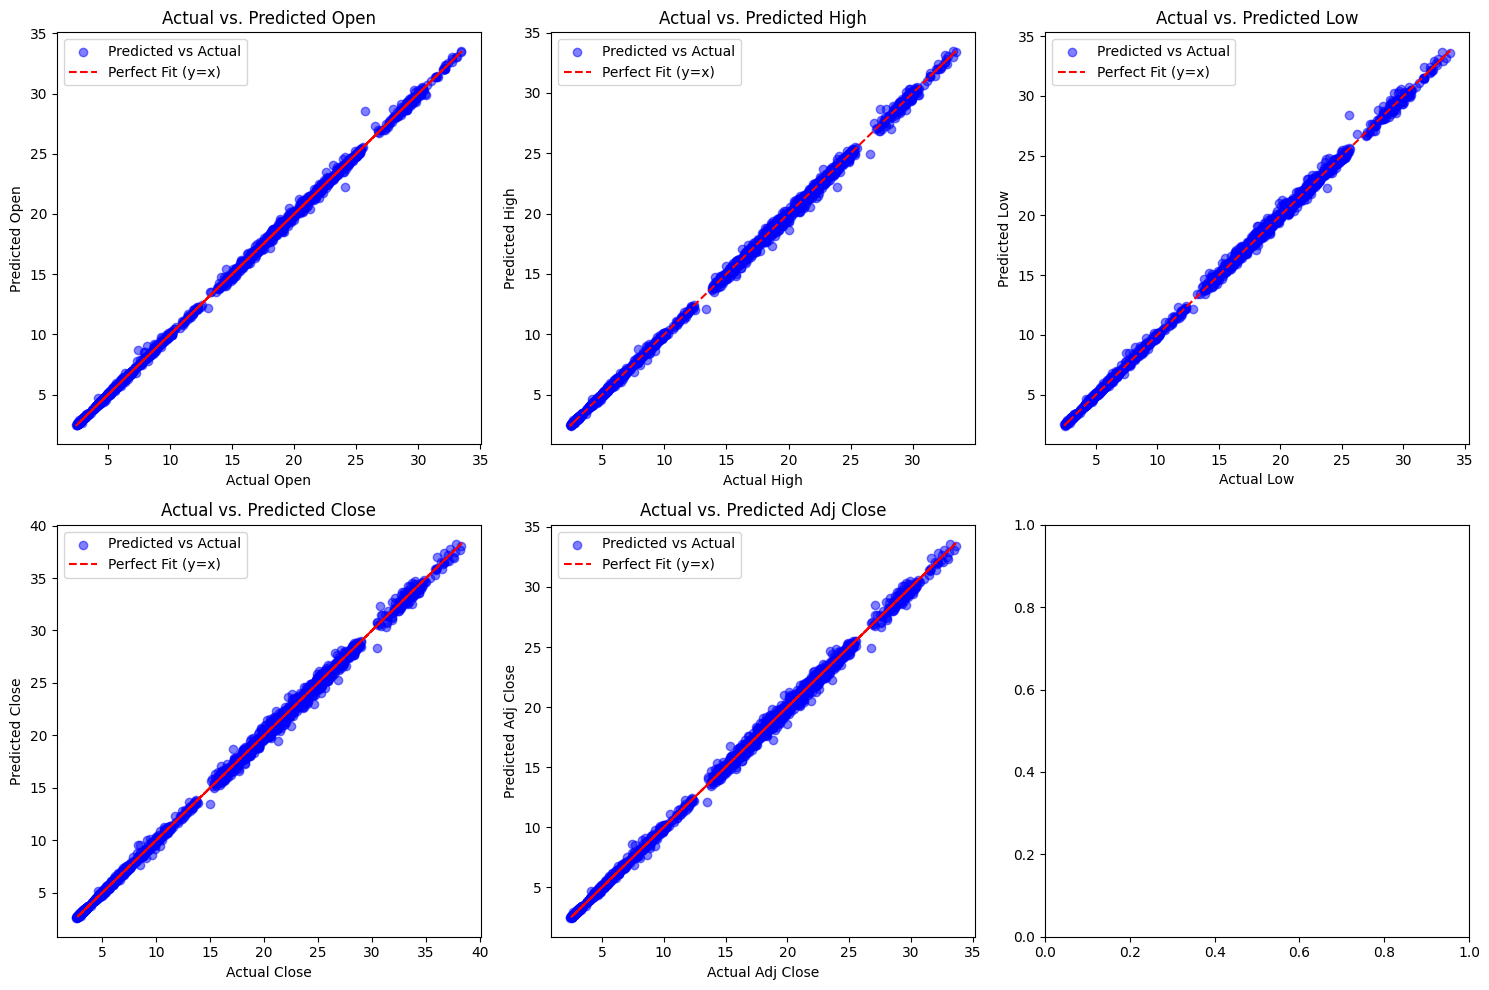

In [297]:
features = ["Open", "High", "Low", "Close", "Adj Close"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].scatter(y_mr_test[:, i], y_mr_pred[:, i], color="blue", alpha=0.5, label="Predicted vs Actual")
    axes[i].plot(y_mr_test[:, i], y_mr_test[:, i], color="red", linestyle="--", label="Perfect Fit (y=x)")
    axes[i].set_xlabel(f"Actual {feature}")
    axes[i].set_ylabel(f"Predicted {feature}")
    axes[i].set_title(f"Actual vs. Predicted {feature}")
    axes[i].legend()

plt.tight_layout()
plt.show()


##***Conclusions***



*   *The best model based on r2 score is the linear regression model with the SVR(linear kernel) model coming very close.*
*   *Rest of the models perform poorly as shown by their negative r2 scores*


In [298]:
#Predicting Values using Linear Regression
#scaler_mry.inverse_transform(regressor2.predict(scaler_mrx.transform([[Open , High , Low , Adj Close , Close]])))

#**Predicting Market Status**

##*Splitting the DataSet*

###[Reason for Chronological split](#scrollTo=o6tLMT7K7FZG)




In [299]:
X_c = df[['Open','High','Low']]
y_c = df[['Market Status']]
split_index = int(len(df)*0.80)
X_c_train, X_c_test = X_c.iloc[:split_index], X_c.iloc[split_index:]
y_c_train, y_c_test = y_c.iloc[:split_index], y_c.iloc[split_index:]


##*Scaling*

In [300]:
from sklearn.preprocessing import StandardScaler
scaler_c = StandardScaler()
X_c_train = scaler_c.fit_transform(X_c_train)
X_c_test = scaler_c.transform(X_c_test)


##*KNN Classification*

In [301]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_c_train, y_c_train)
y_c_pred = classifier.predict(X_c_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [302]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_knn = confusion_matrix(y_c_test, y_c_pred)
print(cm_knn)
accuracy_score(y_c_test, y_c_pred)

[[ 977    0   32]
 [   4    0    0]
 [1092    0  117]]


0.49234923492349236

##*Random Forest Classification*

In [303]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_c_train, y_c_train)
y_c_pred = classifier.predict(X_c_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [304]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_RFC = confusion_matrix(y_c_test, y_c_pred)
print(cm_RFC)
accuracy_score(y_c_test, y_c_pred)

[[ 974    0   35]
 [   4    0    0]
 [1113    0   96]]


0.4815481548154815

##*Naive Bayes Classification*

In [305]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_c_train, y_c_train)
y_c_pred = classifier.predict(X_c_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [306]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_NBC = confusion_matrix(y_c_test, y_c_pred)
print(cm_NBC)
accuracy_score(y_c_test, y_c_pred)

[[   0    0 1009]
 [   0    0    4]
 [   0    0 1209]]


0.5441044104410441

##*SVM(Linear) Classification*

In [307]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_c_train, y_c_train)
y_c_pred = classifier.predict(X_c_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [308]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_SVML = confusion_matrix(y_c_test, y_c_pred)
print(cm_SVML)
accuracy_score(y_c_test, y_c_pred)

[[ 165    0  844]
 [   0    0    4]
 [  13    0 1196]]


0.6125112511251125

##*SVM(RBF) Classification*

In [309]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_c_train, y_c_train)
y_c_pred = classifier.predict(X_c_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [310]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_RBF = confusion_matrix(y_c_test, y_c_pred)
print(cm_RBF)
accuracy_score(y_c_test, y_c_pred)

[[ 985    0   24]
 [   4    0    0]
 [1134    0   75]]


0.47704770477047703

##*Logistics Regression*

In [311]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_c_train, y_c_train)
y_c_pred = classifier.predict(X_c_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [312]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_LR = confusion_matrix(y_c_test, y_c_pred)
print(cm_LR)
accuracy_score(y_c_test, y_c_pred)

[[ 651    0  358]
 [   0    0    4]
 [  70    0 1139]]


0.8055805580558055

##***Conclusion***



*   *Again the linear models perform better than other models*

